# Probability Inequalities

Today we shall study some standard inequalities for estimating **tail** probabilities. Given a random variable $X$, a tail probability is of the form $\mathbb{P}\{X \geq t\}$ where $t$ is some number that is larger than the mean of $X$ i.e., $t \geq \mathbb{E}(X)$. 

Strictly speaking, this should be called a **right** tail probability as it concerns the region $[t, \infty)$ which is on the right extreme of the probability distribution of $X$. We can analogously define left tail probabilities as regions of the form $\mathbb{P}\{X \leq t\}$ where $t$ is some number that is smaller than the mean of $X$ i.e., $t \leq \mathbb{E}(X)$. Note that we can write $\mathbb{P}\{X \leq t\} = \mathbb{P}\{-X \geq -t\}$ so left tail probabilities for $X$ are simply right tail probabilities for $-X$. In this lecture, when we talk of tail probabilities, we mean right tail probabilities. The inequalities derived for right tail probabilities will also apply to left tail probabilities by applying the right tail probability bound to $-X$. 

The specific inequalities that we shall consider are: 

1. Markov inequality
2. Moment-based bounds
3. Chernoff bound
4. Hoeffding bound

These inequalities are of historical interest; they will also be used in the next two lectures for understanding algorithms for Multi-Armed Bandit problems. 

## Markov Inequality

Suppose $X$ is a **nonnegative** random variable with mean $\mu$ (i.e., $\mathbb{E}(X) = \mu$). Then for every $t \geq 0$, 
\begin{align*}
   \mathbb{P} \left\{X \geq t \right\} \leq \frac{\mu}{t} 
\end{align*}
Markov's inequality gives a meaningful bound only when $t \geq \mu = \mathbb{E}(X)$ (otherwise the bound $\mu/t$ is more than 1) i.e., for tail probabilities. 

We will skip the proof of Markov's inequality here (you can look at the notes for Prob 140 for the proof). More insight into the working of Markov inequality can be gained from thinking about the following question. 

**Question**: Suppose $X$ is a nonnegative random variable with mean 1 i.e., $\mathbb{E}(X) = 1$. What can then be said about $\mathbb{P}\{X \geq 2\}$?

The answer to the above question can vary quite a bit depending on the distribution of $X$. Here are some examples:

1. Suppose $X$ is actually a constant taking the value 1. Then $\mathbb{P}\{X \geq 2\}$ obviously equals 0.
2. Suppose $X$ has the Poisson distribution with mean 1. Then $\mathbb{P}\{X \geq 2\} = 1 - \mathbb{P}\{X = 0\} - \mathbb{P}\{X = 1\} = 1 - \frac{1}{e} - \frac{1}{e} = 1 - \frac{2}{e} \approx 0.264$.
3. Suppose $X$ has the Exponential distribution with mean 1. The density of $X$ is given by $e^{-x}$ for $x \geq 0$. Then $\mathbb{P}\{X \geq 2\} = \int_2^{\infty} e^{-x} dx = e^{-2} \approx 0.135$.
4. Suppose $X$ is a discrete random variable taking the two values 0 and 2 with probability 0.5 each. Then $\mathbb{E}(X) = 1$ and $\mathbb{P}\{X \geq 2\} = \mathbb{P}\{X = 2\} = 0.5$. 

Markov's inequality states that even though $\mathbb{P}\{X \geq 2\}$ varies quite a bit, it never exceeds $\frac{\mathbb{E}(X)}{2} = \frac{1}{2} = 0.5$. The quality of this inequality obviously depends on the actual distribution of $X$. In the fourth example above, Markov's inequality is tight (or exact) but it is loose (to various degrees) in the other three cases. 

It is very important to note that Markov's inequality only applies to nonnegative random variables. To see this, consider the following variant of the above question. 

**Question**: Suppose $X$ is a random variable (not necessarily nonnegative) with mean 1 i.e., $\mathbb{E}(X) = 1$. What can then be said about $\mathbb{P}\{X \geq 2\}$?

In this case, $\mathbb{P}\{X \geq 2\}$ can be quite large. In fact, it can be as close to 1 as possible. To construct an example of a random variable $X$ for which $\mathbb{E}(X) = 1$ and $\mathbb{P}\{X \geq 2\} = 0.999$, just define 
\begin{align*}
   \mathbb{P}\{X = 2\} = 0.999 ~~ \text{ and } ~~ \mathbb{P}\{X = -M\} = 0.001
\end{align*}
for some $M > 0$. The value of $M$ will be chosen so that  $\mathbb{E}(X) = 1$:
\begin{align*}
   \mathbb{E}(X) = -M*(0.001) + 2*(0.999) = 1 \implies M = \frac{2*0.999 - 1}{0.001} = 998.
\end{align*}





## Moment-based Tail Bound

Markov's inequality can be applied in clever ways to obtain tail bounds for $\mathbb{P}\{X \geq t\}$ that are smaller than $\frac{\mathbb{E}(X)}{t}$. For example, applying Markov's inequality with $X^2$ instead of $X$, we obtain 
\begin{align*}
  \mathbb{P}\{X \geq t\} = \mathbb{P}\{X^2 \geq t^2\} \leq \frac{\mathbb{E}(X^2)}{t^2},
\end{align*}
for nonnegative random variable $X$ and $t \geq 0$. Depending on the values of $\mathbb{E}(X)$, $\mathbb{E}(X^2)$ and $t$, this bound can be smaller or larger than $\frac{\mathbb{E}(X)}{t}$. One can combine both bounds in one inequality as
\begin{align*}
  \mathbb{P}\{X \geq t\} \leq \min \left(\frac{\mathbb{E}(X)}{t}, \frac{\mathbb{E}(X^2)}{t^2} \right).
\end{align*}
This works because the square function $x \mapsto x^2$ is an increasing function on $[0, \infty)$ so that $X \geq t$ is equivalent to $X^2 \geq t^2$ for nonnegative random variable $X$ and $t \geq 0$. 

Instead of working with the square function, we can work with any positive power of $X$. Indeed $X \geq t$ is equivalent to $X^r \geq t^r$ for every strictly positive power $r$. Applying Markov's ienquality for $X^r$, we deduce that: 
\begin{align*}
   \mathbb{P}\{X \geq t\} \leq \frac{\mathbb{E} (X^r)}{t^r}
\end{align*}
for nonnegative random variables and $t \geq 0$. Since this is true for every $r \geq 0$ (for $r = 0$, the right hand side above is 1 so the inequality is trivially true as probabilities cannot exceed 1), we can take minimum over $r \geq 0$ to get the best bound: 
\begin{align*}
   \mathbb{P}\{X \geq t\} \leq \min_{r \geq 0} \frac{\mathbb{E} (X^r)}{t^r} \tag{Moment}
\end{align*}
This can be referred to as the **moment-based** bound for $\mathbb{P}\{X \geq t\}$ which holds for nonnegative random variables $X$ and $t \geq 0$ (recall that $\mathbb{E} (X^r)$ for $r = 1, 2, \dots$ are called moments of the random variable $X$). 

## Markov's inequality applied to other increasing functions

Suppose $h$ is a strictly increasing and nonnegative-valued function. Then $X \geq t$ is equivalent to $h(X) \geq h(t)$. This can be used with Markov's inequality to obtain the following bound:
\begin{align*}
   \mathbb{P}\{X \geq t\} = \mathbb{P}\{h(X) \geq h(t)\} \leq \frac{\mathbb{E} \left(h(X) \right)}{h(t)}
\end{align*}
Here $X$ can take both positive and negative values but we need $h(X)$ to be a nonnegative random variable (because Markov's inequality is being applied to $h(X)$). Also $t$ can be any real number positive or negative but we need $h(t) \geq 0$. 

For a concrete example, suppose $h(x) = \frac{e^x}{1 + e^x}$ which is a strctly increasing function which always takes nonnegative values. We then get
\begin{align*}
  \mathbb{P}\{X \geq t\} \leq \frac{\mathbb{E} \left(\frac{e^X}{1 + e^X} \right)}{\frac{e^t}{1 + e^t}}.
\end{align*}
For this inequality to be useful in practice, we need to be able to compute the expectation $\mathbb{E} \left(\frac{e^X}{1 + e^X} \right)$. 

## Chernoff Bound: Markov's inequality with Exponentials

The most famous version of the inequality $\mathbb{P}\{X \geq t\} = \mathbb{P}\{h(X) \geq h(t)\} \leq \frac{\mathbb{E} \left(h(X) \right)}{h(t)}$ is when $h$ is an increasing exponential function i.e., $h(x) = \exp(\lambda x)$ for $\lambda \geq 0$. Note that as long as $\lambda \geq 0$, the function $h$ is strictly increasing. Also this $h(x)$ clearly only takes nonnegative values. Applying Markov's inequality to this $h(x)$ leads to
\begin{align*}
   \mathbb{P}\{X \geq t\} \leq \frac{\mathbb{E} \left(e^{\lambda X}\right)}{e^{\lambda t}} ~~~ \text{ for every } \lambda \geq 0. 
\end{align*}
The accuracy of this bound depends on the value of $\lambda$. The best bound is obtained by minimizing the bound over all $\lambda \geq 0$: 
\begin{align}
   \mathbb{P}\{X \geq t\} \leq \min_{\lambda \geq 0} \left(\frac{\mathbb{E} \left(e^{\lambda X}\right)}{e^{\lambda t}} \right) \tag{Chernoff}.
\end{align}
This is a famous probability inequality known as the **Chernoff Bound** (or sometimes the **Cramer-Chernoff Bound**). It applies to every random variable $X$ and every real number $t$ (there is no nonnegativity restriction on $X$ or $t$ as Markov's inequality is applied to $\exp(\lambda x)$; there is a nonnegativity restriction on $\lambda$ however). The bound will be meaningful (i.e., smaller than 1) only when $t \geq \mathbb{E}(X)$. 

## Comparing Moment-based and Chernoff Bounds on $\mathbb{P}\{X \geq t\}$ 

It is instructive to compare the Moment-based and Chernoff Bounds on $\mathbb{P}\{X \geq t\}$:
\begin{align*}
\mathbb{P}\{X \geq t\} \leq \min_{r \geq 0} \frac{\mathbb{E} (X^r)}{t^r} ~~~ \text{ versus } ~~~ \mathbb{P}\{X \geq t\} \leq \min_{\lambda \geq 0} \left(\frac{\mathbb{E} \left(e^{\lambda X}\right)}{e^{\lambda t}} \right)
\end{align*}
Here are some observations: 

1. The moment bound only applies to nonnegative $X$ and $t$ while Chernoff bound is more general applying to all random variables $X$ and real numbers $t$.
2. When $X$ is a nonnegative random variable (and $t \geq 0$), the moment bound is actually better (smaller) than the Chernoff bound. This can be seen as follows: for every $\lambda \geq 0$,
\begin{align*}
  \frac{\mathbb{E} \left(e^{\lambda X}\right)}{e^{\lambda t}} &= \frac{\mathbb{E} \left(\sum_{r=0}^{\infty} \frac{(\lambda X)^r}{r!} \right)}{\sum_{r=0}^{\infty} \frac{(\lambda t)^r}{r!}} \\
&=  \frac{\sum_{r=0}^{\infty} \frac{\lambda^r \mathbb{E}(X^r)}{r!}}{\sum_{r=0}^{\infty} \frac{\lambda^r t^r}{r!}} \\
&= \frac{\sum_{r=0}^{\infty} \frac{\lambda^r t^r}{r!}\frac{\mathbb{E}(X^r)}{t^r}}{\sum_{r=0}^{\infty} \frac{\lambda^r t^r}{r!}} \geq \frac{\sum_{r=0}^{\infty} \frac{\lambda^r t^r}{r!}\left[\min_{r \geq 0} \frac{\mathbb{E}(X^r)}{t^r}\right]}{\sum_{r=0}^{\infty} \frac{\lambda^r t^r}{r!}} = \frac{\sum_{r=0}^{\infty} \frac{\lambda^r t^r}{r!}}{\sum_{r=0}^{\infty} \frac{\lambda^r t^r}{r!}}\left[\min_{r \geq 0} \frac{\mathbb{E}(X^r)}{t^r}\right] = \min_{r \geq 0} \frac{\mathbb{E}(X^r)}{t^r}.
\end{align*}
Since the above lower bound on $ \frac{\mathbb{E} \left(e^{\lambda X}\right)}{e^{\lambda t}}$ holds for every $\lambda \geq 0$, it will continue to hold with $\min_{\lambda \geq 0}$ leading to
\begin{align*}
\min_{\lambda \geq 0}  \frac{\mathbb{E} \left(e^{\lambda X}\right)}{e^{\lambda t}} \geq  \min_{r \geq 0} \frac{\mathbb{E}(X^r)}{t^r}.
\end{align*}
Thus for nonnegative $X$ and $t$, the moment bound gives smaller (more accurate) bounds for $\mathbb{P}\{X \geq t\}$ compared to the Chernoff bound.
3. In order to apply the moment bound, one needs to calculate (or further upper bound) some moments for $X$. On the other hand, to apply Chernoff's bound, one needs to calculate $\mathbb{E}(e^{\lambda X})$ for some $\lambda \geq 0$ (it is helpful to recall here that the function $\lambda \mapsto \mathbb{E} e^{\lambda X}$ is called the Moment Generating Function, MGF, of $X$). Quite often, calculating moments is relatively harder (more tedious) compared to MGF calculation. For example, suppose $X$ can be written as the sum of $n$ independent simpler random variables $X_1, \dots, X_n$ as $X = X_1 + \dots + X_n$. In this case, it is easier to calculate the MGF of $X$ because $\mathbb{E} e^{\lambda X} = \mathbb{E} e^{\lambda X_1} \times \mathbb{E} e^{\lambda X_2} \dots \times \mathbb{E} e^{\lambda X_n}$ and each term $\mathbb{E} e^{\lambda X_i}$ should be easier to calculate. On the other hand, the moments of $X$ are more tedious to compute in terms of the moments of $X_1, \dots, X_n$.

Because of the first and third reasons above, one usually works with the Chernoff bound for bounding tail probabilities. 

## Two Applications of Chernoff's Bound

### Application One: Normal Tails

Suppose $X \sim N(0, 1)$ and we are interested in the probability $\mathbb{P}\{X \geq 3\}$. The actual value of this probability is given by:

In [1]:
import numpy as np
from scipy import stats
t = 3
actual_prob = 1 - stats.norm.cdf(t)
print(actual_prob)

0.0013498980316301035


Thus $\mathbb{P}\{X \geq 3\} \approx 0.00135$. What does Chernoff bound give? To apply the Chernoff bound, we need to first calculate the MGF $\mathbb{E} e^{\lambda X}$. It is a standard fact that the MGF of $N(0, 1)$ is given by $e^{\lambda^2/2}$. Thus Chernoff bound gives (for $t \geq 0$):
\begin{align*}
   \mathbb{P}\{X \geq t\} \leq \min_{\lambda \geq 0} \frac{\mathbb{E} e^{\lambda X}}{e^{\lambda t}} = \min_{\lambda \geq 0}  \frac{e^{\lambda^2/2}}{e^{\lambda t}} = \min_{\lambda \geq 0} \exp \left(-\lambda t + \frac{\lambda^2}{2} \right) = \exp \left(\min_{\lambda \geq 0} \left[ -\lambda t + \frac{\lambda^2}{2}\right] \right)
\end{align*}
To calculate the minimum over $\lambda \geq 0$ above, differentiate with respect to $\lambda$ and set the resulting derivative to zero. This gives $\lambda = t$ (as we assumed $t \geq 0$, we are allowed to take $\lambda = t$). Plugging in $\lambda = t$, we deduce
\begin{align*}
  \mathbb{P}\{X \geq t\}  \leq \exp \left(-\frac{t^2}{2} \right).  
\end{align*}
For $t = 3$, the Chernoff bound is given by: 

In [2]:
t = 3
chernoff_bound = np.exp(-0.5*(t**2))
print(chernoff_bound)
print(chernoff_bound/actual_prob)

0.011108996538242308
8.229507916851585


Compare to the actual value of 0.00135, the Chernoff bound for $\mathbb{P}\{X \geq 3\}$ equals 0.011. Thus the Chernoff bound, in this case, is off by about a factor of 8 which is somewhat large. Despite lack of good accuracy, the Chernoff bound is often used for the normal tails because it is very simple. By setting $\exp(-t^2/2)$ to be equal to some fixed $\alpha \in (0.5, 1)$, the Chernoff bound allows us to deduce that
\begin{align*}
   X \leq \sqrt{2 \log \frac{1}{\alpha}} ~~~ \text{ with probability at least } 1- \alpha. 
\end{align*}
Below is a comparison of the actual probability and the Chernoff bound for a range of values of $t$:

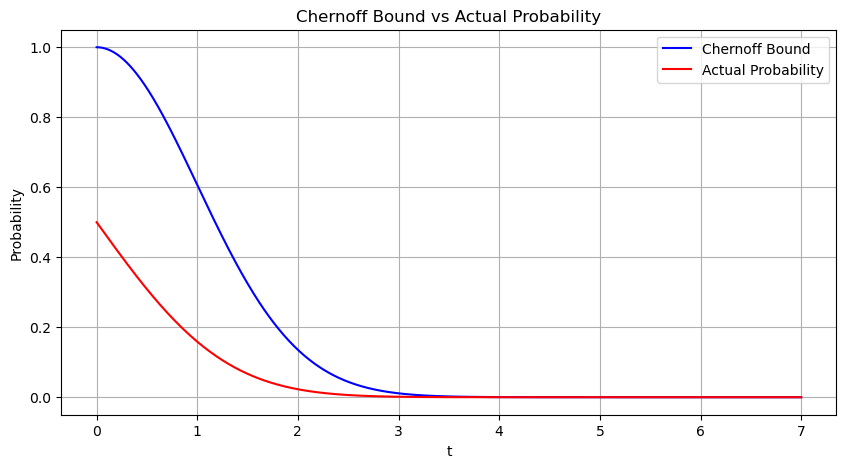

In [3]:
#Normal Tail Probablity:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

t_min = 0
t_max = 7
t = np.arange(t_min, t_max + .01, 0.01)

chernoff_bound = np.exp(-0.5*(t**2))
actual_prob = 1 - stats.norm.cdf(t)

plt.figure(figsize=(10, 5)) 
plt.plot(t, chernoff_bound, label='Chernoff Bound', color='blue')
plt.plot(t, actual_prob, label='Actual Probability', color='red')
plt.xlabel('t')
plt.ylabel('Probability')
plt.title('Chernoff Bound vs Actual Probability')
plt.legend()
plt.grid(True)
plt.show()
#Because of the scale of the plot, it appears that the two quantities are very close for t more than 3.
#A plot on the logarithmic scale will reveal more differences.

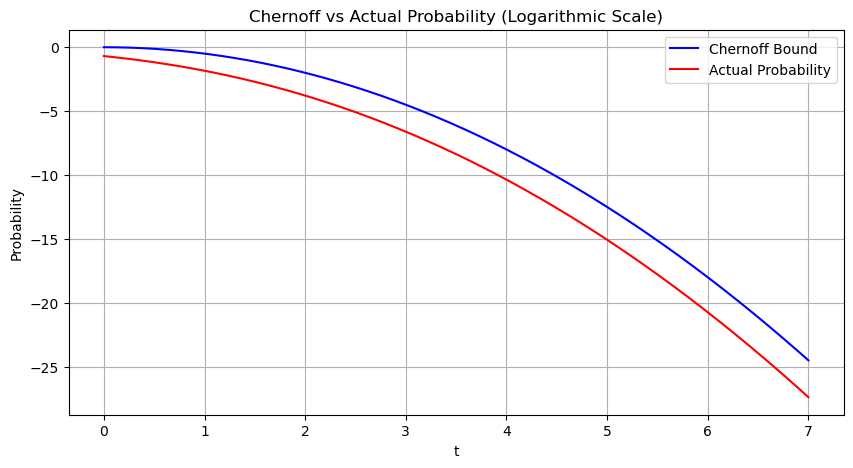

In [4]:
#Plotting on log scale:
plt.figure(figsize=(10, 5)) 
plt.plot(t, np.log(chernoff_bound), label='Chernoff Bound', color='blue')
plt.plot(t, np.log(actual_prob), label='Actual Probability', color='red')
plt.xlabel('t')
plt.ylabel('Probability')
plt.title('Chernoff vs Actual Probability (Logarithmic Scale)')
plt.legend()
plt.grid(True)
plt.show()

### Application Two: Binomial Tails

Suppose $X$ has the $\text{Binomial}(n, p)$ distribution. We would like to use the Chernoff bound to get upper bounds for $\mathbb{P}\{X \geq t\}$. For a concrete example, suppose $n = 3000$ and $p = 0.5$ and $t = 2000$. The actual value of the probability is given by
\begin{align*}
   \mathbb{P}\{X \geq t\} = \sum_{k = t}^n {n \choose k} p^k (1 - p)^{n-k} = \sum_{k = 2000}^{3000} {n \choose k}2^{-3000}
\end{align*}
The above expression, while being exact, is quite complicated. It is not easy to directly calculate this probability because in each term $2^{-3000}$ is quite small and ${n \choose k}$ is quite large. So we cannot really compute these two terms separately before multiplying them. We can use built-in libraries in Python to calculate this probability as follows. 

In [5]:
#Binomial Tail Probability: 
from scipy.stats import binom
n = 3000
p = 0.5
t = 2000
#actual probability that Binomial(n, p) \geq t
prob = sum(binom.pmf(k, n, p) for k in range(t, (n+1)))
print(f"Actual probability is {prob}")

Actual probability is 5.045074313970589e-76


Thus the tail probability that $\text{Bin}(3000, 0.5) \geq 2000$ equals $5.045 \times 10^{-76}$. Let us now see what upper bound the Chernoff bound gives for this probability. To use the Chernoff bound, we need to calculate the MGF of $X$. For this, we can write $X = X_1 + \dots + X_n$ where $X_i \overset{\text{i.i.d}}{\sim} \text{Ber}(p)$ (this is the fact that Binomial is the sum of i.i.d Bernoullis). This gives
\begin{align*}
   \mathbb{E} e^{\lambda X} &= \mathbb{E} e^{\lambda(X_1 + \dots + X_n)} \\
   &= \mathbb{E} \left( e^{\lambda X_1} e^{\lambda X_2} \dots e^{\lambda X_n} \right) \\
   &= \mathbb{E} e^{\lambda X_1} \mathbb{E} e^{\lambda X_2}  \dots \mathbb{E} e^{\lambda X_n} \\
   &= \left(\mathbb{E} e^{\lambda X_1} \right)^n = \left(1 - p + p e^{\lambda} \right)^n.
\end{align*}
Thus Chernoff bound gives
\begin{align*}
   \mathbb{P}\{X \geq t\} &\leq \min_{\lambda \geq 0} \frac{\mathbb{E} e^{\lambda X}}{e^{\lambda t}} \\
   &= \min_{\lambda \geq 0} \frac{\left(1 - p + p e^{\lambda} \right)^n}{e^{\lambda t}} \\
   &= \min_{\lambda \geq 0} \exp \left[-\lambda t + n \log \left(1 - p + p e^{\lambda} \right) \right] \\
   &= \exp \left[\min_{\lambda \geq 0} \left\{-\lambda t + n \log \left(1 - p + p e^{\lambda} \right) \right\} \right].
\end{align*}
In order to proceed further, we need to calculate the minimum value of $-\lambda t + n \log \left(1 - p + p e^{\lambda} \right)$ over all $\lambda \geq 0$. Taking the derivative with respect of $\lambda$ and setting the derivative equal to zero, we obtain the equation: 
\begin{align*}
   -t + \frac{n p e^{\lambda}}{1 - p + p e^{\lambda}} = 0
\end{align*}
solving which leads to
\begin{align*}
  \lambda = \log \frac{t(1-p)}{(n-t)p}. 
\end{align*}
We can plug in this value of $\lambda$ in the Chernoff bound. Before that, we need to check that this $\lambda$ is nonnegative. It is easy to verify that $\lambda \geq 0$ if and only if $t \geq np$ (note that $np$ is the mean of the Binomial$(n, p)$ distribution so that $t \geq np$ means that $\mathbb{P}\{X \geq t\}$ is a tail probability). Thus when $t \geq np$, Chernoff bound is given by
\begin{align*}
   \mathbb{P}\{X \geq t\} &\leq \exp \left[\min_{\lambda \geq 0} \left\{-\lambda t + n \log \left(1 - p + p e^{\lambda} \right) \right\} \right] \\
   &= \exp \left[-t \log \frac{t(1-p)}{(n-t)p} + n \log \left(1 - p + \frac{t(1-p)}{n-t} \right) \right] \\
   &= \exp \left[-t \log \frac{t(1-p)}{(n-t)p} + n \log \frac{n(1-p)}{n-t} \right] \\
   &= \exp \left[ -n \left\{\frac{t}{n} \log \frac{t(1-p)}{(n-t)p} - \log \frac{n(1-p)}{n-t} \right\} \right] \\
   &= \exp \left[ -n \left\{\frac{t}{n} \log \frac{t}{np} - \frac{t}{n} \log \frac{(n-t)}{n(1-p)} + \log \frac{n-t}{n(1-p)} \right\} \right] \\
   &= \exp \left[ -n \left\{\frac{t}{n} \log \frac{t/n}{p}  + \left(1 - \frac{t}{n} \right) \log \frac{1-(t/n)}{1-p} \right\} \right]
\end{align*}
We can rewrite this Chernoff bound as follows. For $X \sim \text{Binomial}(n, p)$ and $t \geq np$, we have 
\begin{align*}
\mathbb{P}\{X \geq t\} &\leq \exp \left[- n D \left(t/n, p \right) \right] ~~~ \text{    where } D(\rho, p) := \rho \log \frac{\rho}{p} + (1 - \rho) \log \frac{1-\rho}{1-p}. 
\end{align*}
In the specific case $n = 3000, t = 2000, p = 0.5$, the Chernoff bound is given by
\begin{align*}
  \exp \left(-3000 * \left[(2/3) \log \frac{2/3}{0.5} + (1/3) \log \frac{1/3}{0.5} \right] \right)
\end{align*}

In [6]:
from scipy.stats import binom
n = 3000
p = 0.5
t = 2000

#actual probability that Binomial(n, p) \geq t
prob = sum(binom.pmf(k, n, p) for k in range(t, (n+1)))
print(f"Actual probability is {prob}")

#Chernoff bound:
import numpy as np
D = (t/n)*(np.log(t/(n*p))) + (1-(t/n))*(np.log((1-(t/n))/(1-p)))
prob_chernoff = np.exp(-n*D)
print(f"Chernoff Bound is {prob_chernoff}")

print(prob_chernoff/prob)

Actual probability is 5.045074313970589e-76
Chernoff Bound is 1.6360095673256445e-74
32.427858650075414


Thus the Chernoff bound in this case is off by about a factor of 32. It still does a decent job given how small the actual probability is. 

#### Kullback-Leibler Divergence

The quantity $D(\rho, p) := \rho \log \frac{\rho}{p} + (1 - \rho) \log \frac{1-\rho}{1-p}$ is called the Kullback-Leibler divergence between $\rho$ and $p$ and can be interpreted as a measure of discrepancy between $\rho$ and $p$. If $\rho$ is far from $p$, then $D(\rho, p)$ will be large, and conversely if $\rho$ is close to $p$, then $D(\rho, p)$ will be small. In the extreme case when $\rho = p$, we will have $D(\rho, p) = 0$. Here is a plot of $D(\rho, p)$ for fixed $p = 0.5$ as $\rho$ varies from 0.5 to 1. 

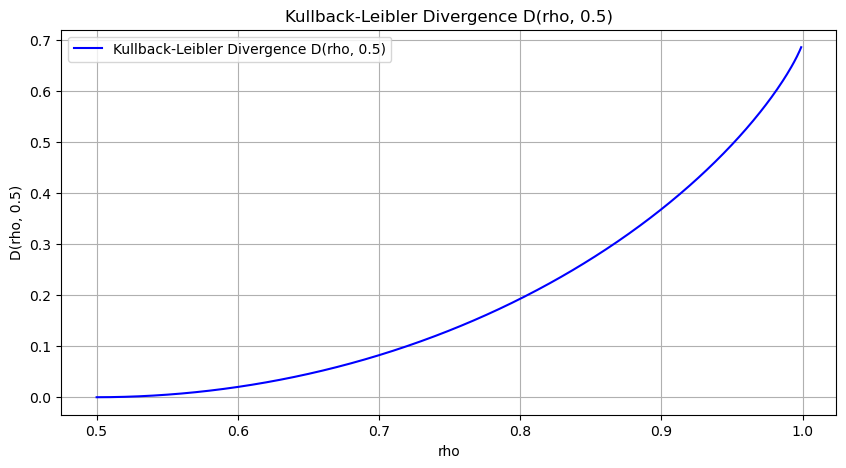

In [7]:
p = 0.5
rho_values = np.arange(0.5, 1, 0.001)
D_values = rho_values * np.log(rho_values/p) + (1 - rho_values) * np.log((1-rho_values)/(1-p))
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.plot(rho_values, D_values, label = "Kullback-Leibler Divergence D(rho, 0.5)", color = "blue")
plt.xlabel('rho')
plt.ylabel('D(rho, 0.5)')
plt.title('Kullback-Leibler Divergence D(rho, 0.5)')
plt.legend()
plt.grid(True)
plt.show()

It is clear from the plot above that $D(\rho, p)$ is small for $\rho \approx p$ and is large for $\rho$ far from $p$. One can relate $D(\rho, p)$ to the more natural squared distance $(\rho-p)^2$ in the following way. Write $F(\rho) := D(\rho, p) = \rho \log \frac{\rho}{p} + (1 - \rho) \log \frac{1-\rho}{1-p}$. Taylor expansion to second order in $\rho$ around $\rho = p$ gives
\begin{align*}
   F(\rho) = F(p) + F'(p) (\rho - p) + \frac{1}{2} F''(q) (\rho - p)^2
\end{align*}
for some $q$ lying between $\rho$ and $p$. Using $F(p) = 0$, $F'(\rho) = \log \frac{\rho}{1 - \rho} - \log \frac{p}{1-p}$ (so that $F'(p) = 0$) and $F''(\rho) = \frac{1}{\rho(1-\rho)}$, we get
\begin{align*}
   F(\rho) = \frac{1}{2} \frac{1}{q(1-q)} (\rho - p)^2.
\end{align*}
Since $q(1-q)$ is always smaller than $1/4$ (its maximum is achieved when $q = 1/2$), we deduce
\begin{align*}
   D(\rho, p) \geq 2(\rho - p)^2
\end{align*}

## Hoeffding's Bound for Binomial

Chernoff bound for the Binomial: $\mathbb{P} \{X \geq t\} \leq \exp \left(-n D(t/n, p) \right)$ for $t \geq np$ together with the just derived bound $D(\rho, p) \geq 2 (\rho - p)^2$ gives
\begin{align*}
   \mathbb{P} \{X \geq t\} \leq \exp \left(-2 n \left(\frac{t}{n} - p \right)^2 \right) = \exp \left(-2\frac{(t - np)^2}{n} \right) ~~~ \text{ for } t \geq np. 
\end{align*}
This bound for the Binomial Tail is referred to as the Hoeffding bound. In the special case $n = 3000, t = 2000, p = 0.5$, the Hoeffding bound is given by:

In [8]:
#Hoeffding Bound
n = 3000
t = 2000
p = 0.5
prob_hoeffding = np.exp(-(2/n)*((t - n*p)**2))
print(f"Hoeffding Bound gives {prob_hoeffding}")
print(prob_hoeffding/prob)

Hoeffding Bound gives 4.14559001356413e-73
821.7103962342738


Thus, in this case, the Hoeffding bound is off by a factor of about 821 (in contrast, Chernoff was off by a factor of only 32). 

## More General Hoeffding Bound 

There is a more general version of the Hoeffding bound which holds for $X = X_1 + \dots + X_n$ for i.i.d and **bounded** random variables $X_1, \dots, X_n$. Specifically, assume that each $X_i$ has mean $\mu$ and that each $X_i$ lies between two fixed numbers $a$ and $b$: $a \leq X_i \leq b$. The mean of $X$ equals $n\mu$. Suppose $t \geq n \mu$ and we are interested in bounding the tail probability $\mathbb{P}\{X \geq t\}$. Hoeffding's inequality states that: 
\begin{align*}
   \mathbb{P}\{X \geq t\} \leq \exp \left(- \frac{2 \left(t - n\mu \right)^2}{n(b-a)^2} \right)
\end{align*}
Like in the case of the Binomial, this bound can also be derived by first writing down the Chernoff bound, and then further bounding the resulting bound by a Taylor expansion. We shall see this proof in more detail in the next lecture. We shall also see some applications of the Hoeffding bound to multi-armed Bandit problems. 